# Gold Price Analysis

### 1. Set up environment

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load data from yahoo.finance

In [3]:
gld = pdr.get_data_yahoo('GLD','2016-11-08')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,122.709999,121.879997,122.660004,122.150002,10015000,122.150002
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998


In [4]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 959 entries, 2016-11-07 to 2020-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       959 non-null    float64
 1   Low        959 non-null    float64
 2   Open       959 non-null    float64
 3   Close      959 non-null    float64
 4   Volume     959 non-null    int64  
 5   Adj Close  959 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 52.4 KB


### 3. Select close price data for analysis

In [5]:
gld_close = pd.DataFrame(gld.Close)
gld_close.head()

,Close
Date,
2016-11-07,122.150002
2016-11-08,121.639999
2016-11-09,121.559998
2016-11-10,119.750000
2016-11-11,117.099998


### 4. Use rolling method to compute moving averages

Moving averages (MA)

$$ MA = \frac{\Sigma_{i=1}^{N} C_{i}}{N} $$

In [6]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()  
# shift ข้อมูล MA_9 (ทำให้ NaN จาก 8 เป็น 9)
gld_close['MA_21'] = gld_close.Close.rolling(21).mean()
gld_close.head(30)

,Close,MA_9,MA_21
Date,,,
2016-11-07,122.150002,NaN,NaN
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN
2016-11-15,117.120003,NaN,NaN
2016-11-16,116.769997,NaN,NaN
2016-11-17,116.169998,NaN,NaN


### 5. Plot close price data and moving averages

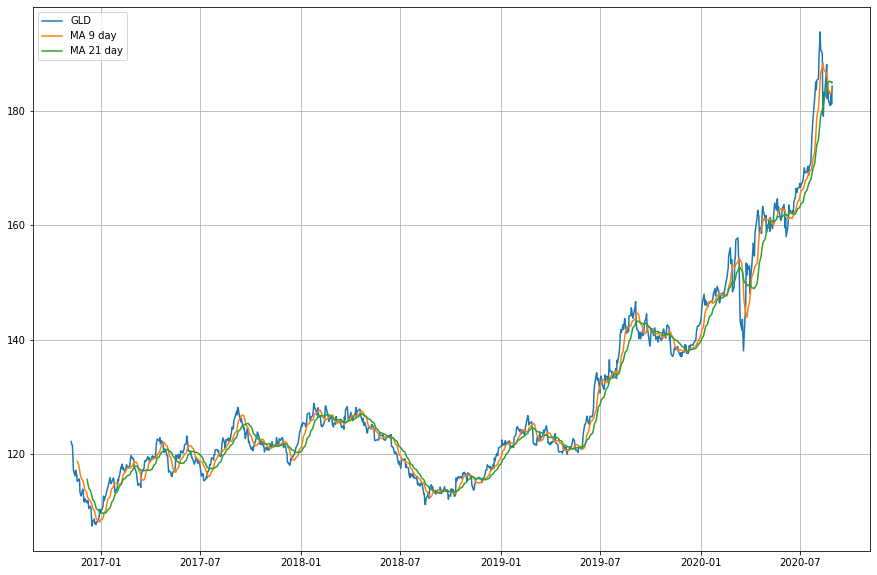

In [7]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close['Close'],label='GLD')
plt.plot(gld_close['MA_9'],label='MA 9 day')
plt.plot(gld_close['MA_21'],label='MA 21 day')
plt.legend(loc=2) # loc = ใช้ปรับตำแหน่งของ label

### 6. Compute log change (instantaneous rate of return)
https://en.wikipedia.org/wiki/Continuously_compounded_nominal_and_real_returns
http://www.tbs.tu.ac.th/wp-content/uploads/2018/01/03.pdf


continuously compounded rate of return หรือ instantaneous rate of return $RC_{t}$ คือ ดอกเบี้ยแบบทบต้น ทำให้งวดต่อไปดอกเบี้ยเพิ่มสูงขึ้น

$$RC_{t}=\ln (\frac{P_{t}}{P_{t-1}})$$




In [8]:
gld_close["change"] = np.log(gld_close["Close"] / gld_close["Close"].shift())
gld_close.head()

,Close,MA_9,MA_21,change
Date,,,,
2016-11-07,122.150002,NaN,NaN,NaN
2016-11-08,121.639999,NaN,NaN,-0.004184
2016-11-09,121.559998,NaN,NaN,-0.000658
2016-11-10,119.750000,NaN,NaN,-0.015002
2016-11-11,117.099998,NaN,NaN,-0.022378


### 7. Plot reveals noise data centered around 0

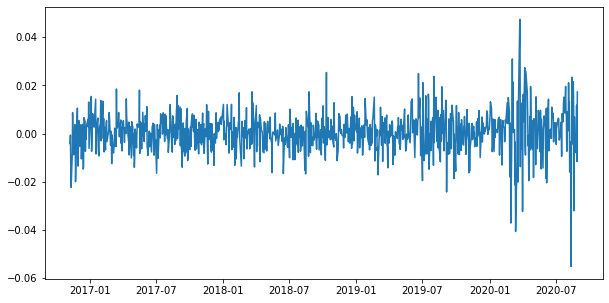

In [9]:
plt.figure(figsize=(10,5))
plt.plot(gld_close.change)

### 8. Compute rolling historical volatility, offset using .shift() method

https://www.finnomena.com/dr-jitipol/volatility/

https://newtypetrader.wordpress.com/2015/02/20/volatility-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3/

Volatility (ค่าความแปรปรวน) คือ ค่าที่วัดระยะห่างของแต่ละข้อมูลว่าห่างจากค่ากลางหรือค่าเฉลี่ยเท่าไหร่ หรือ ในทางหุ้น คือ ราคาเหวี่ยงจากค่าเฉลี่ยมากเท่าไหร่ ยิ่งความแปรแรวนมาก ราคาก้วิ่งออกจากค่าเฉลี่ยมาก

$$Var(X)=\frac{1}{n}\Sigma_{i=1}^{n}(x_{i}-\mu)^{2}$$





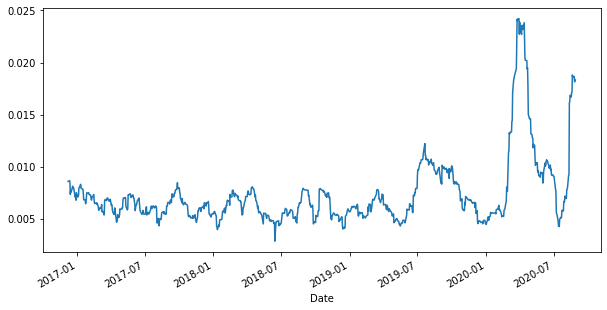

In [10]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
plt.figure(figsize=(10,5))
gld_close['Volatility'].plot()

## Past 2 some price analysis

In [11]:
# offset expected change 1-day to prevent "forecasting" the current day

gld_close['exp_chng'] = gld_close['Volatility'] * gld_close['Close'].shift()
gld_close['actual_chng'] = gld_close['Close'] - gld_close['Close'].shift()

In [12]:
gld_close.head(30)

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng
Date,,,,,,,
2016-11-07,122.150002,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-08,121.639999,NaN,NaN,-0.004184,NaN,NaN,-0.510002
2016-11-09,121.559998,NaN,NaN,-0.000658,NaN,NaN,-0.080002
2016-11-10,119.750000,NaN,NaN,-0.015002,NaN,NaN,-1.809998
2016-11-11,117.099998,NaN,NaN,-0.022378,NaN,NaN,-2.650002
2016-11-14,116.110001,NaN,NaN,-0.008490,NaN,NaN,-0.989998
2016-11-15,117.120003,NaN,NaN,0.008661,NaN,NaN,1.010002
2016-11-16,116.769997,NaN,NaN,-0.002993,NaN,NaN,-0.350006
2016-11-17,116.169998,NaN,NaN,-0.005152,NaN,NaN,-0.599998


In [13]:
# running more than once will prograssively give smaller data sets
gld_close = pd.DataFrame(gld_close.iloc[22:])
gld_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng
Date,,,,,,,
2016-12-08,111.570000,112.212223,114.551429,-0.002328,0.008572,0.958654,-0.260002
2016-12-09,110.400002,112.096667,114.020000,-0.010542,0.008582,0.957515,-1.169998
2016-12-12,110.820000,111.718889,113.594762,0.003797,0.008654,0.955386,0.419998
2016-12-13,110.449997,111.446667,113.278095,-0.003344,0.008493,0.941230,-0.370003
2016-12-14,108.830002,111.302222,112.931429,-0.014776,0.007336,0.810275,-1.619995


(array([ 2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         2.,  4.,  1.,  4., 10.,  9., 11., 19., 22., 29., 40., 51., 51.,
        72., 60., 88., 84., 92., 74., 58., 38., 29., 19., 17.,  7., 10.,
         5.,  5.,  8.,  5.,  3.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([-5.84376542, -5.63695845, -5.43015148, -5.22334451, -5.01653754,
        -4.80973057, -4.6029236 , -4.39611663, -4.18930966, -3.98250269,
        -3.77569572, -3.56888875, -3.36208178, -3.15527481, -2.94846784,
        -2.74166088, -2.53485391, -2.32804694, -2.12123997, -1.914433  ,
        -1.70762603, -1.50081906, -1.29401209, -1.08720512, -0.88039815,
        -0.67359118, -0.46678421, -0.25997724, -0.05317027,  0.1536367 ,
         0.36044367,  0.56725064,  0.77405761,  0.98086458,  1.18767155,
         1.39447852,  1.60128549,  1.80809246,  2.01489943,  2.2217064 ,
         2.42851337,  2.63532034,  2.84212731,  3.04893428,  3.25574125,
         3.46254822,  3.66935519,  3.87616216,  4.08296913,

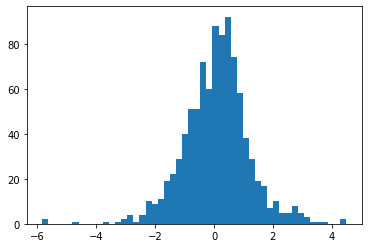

In [14]:
# magnitude in standard deviations
gld_close['Magnitude'] = gld_close['actual_chng'] / gld_close['exp_chng']
plt.hist(gld_close['Magnitude'], bins=50)

In [15]:
gld_close['abs_magni'] = np.abs(gld_close['Magnitude'])
gld_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,,,
2016-12-08,111.570000,112.212223,114.551429,-0.002328,0.008572,0.958654,-0.260002,-0.271216,0.271216
2016-12-09,110.400002,112.096667,114.020000,-0.010542,0.008582,0.957515,-1.169998,-1.221911,1.221911
2016-12-12,110.820000,111.718889,113.594762,0.003797,0.008654,0.955386,0.419998,0.439611,0.439611
2016-12-13,110.449997,111.446667,113.278095,-0.003344,0.008493,0.941230,-0.370003,-0.393105,0.393105
2016-12-14,108.830002,111.302222,112.931429,-0.014776,0.007336,0.810275,-1.619995,-1.999314,1.999314


Text(0, 0.5, 'Magnitude')

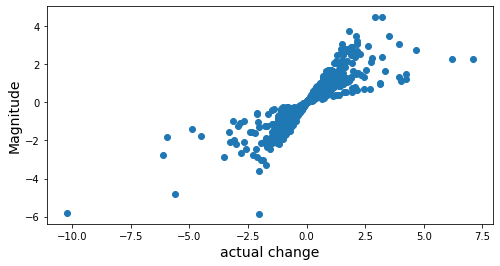

In [16]:
fig = plt.figure(figsize = (8,4))
plt.scatter(gld_close['actual_chng'], gld_close['Magnitude'])
plt.xlabel('actual change', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)

Text(0, 0.5, 'abs magnitude')

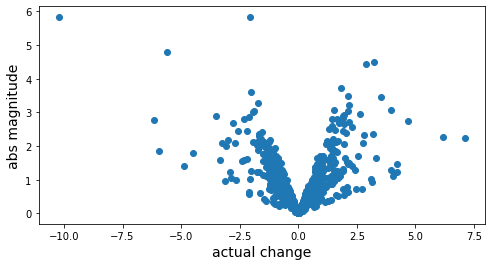

In [17]:
fig = plt.figure(figsize = (8,4))
plt.scatter(gld_close['actual_chng'], gld_close['abs_magni'])
plt.xlabel('actual change', fontsize=14)
plt.ylabel('abs magnitude', fontsize=14)